1	Pregnancies --- Number of pregnancies
2	Glucose ---	Glucose level in blood
3	BloodPressure --- Blood pressure measurement
4	SkinThickness --- Thickness of the skin
5	Insulin ---	Insulin level in blood
6	BMI ---	Body mass index
7	DiabetesPedigreeFunction --- Diabetes percentage
8	Age ---	Age
9	Outcome ---	Final result (1: Yes, the individual has diabetes; 0: No, the individual does not have diabetes)

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

EDA

In [72]:
#data
df = pd.read_csv('Datasets/diabetes.csv')

In [73]:
styled_df = df.head(5).style
styled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1


In [74]:
rows , col =  df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 768 
Number of Columns : 9


In [75]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [76]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

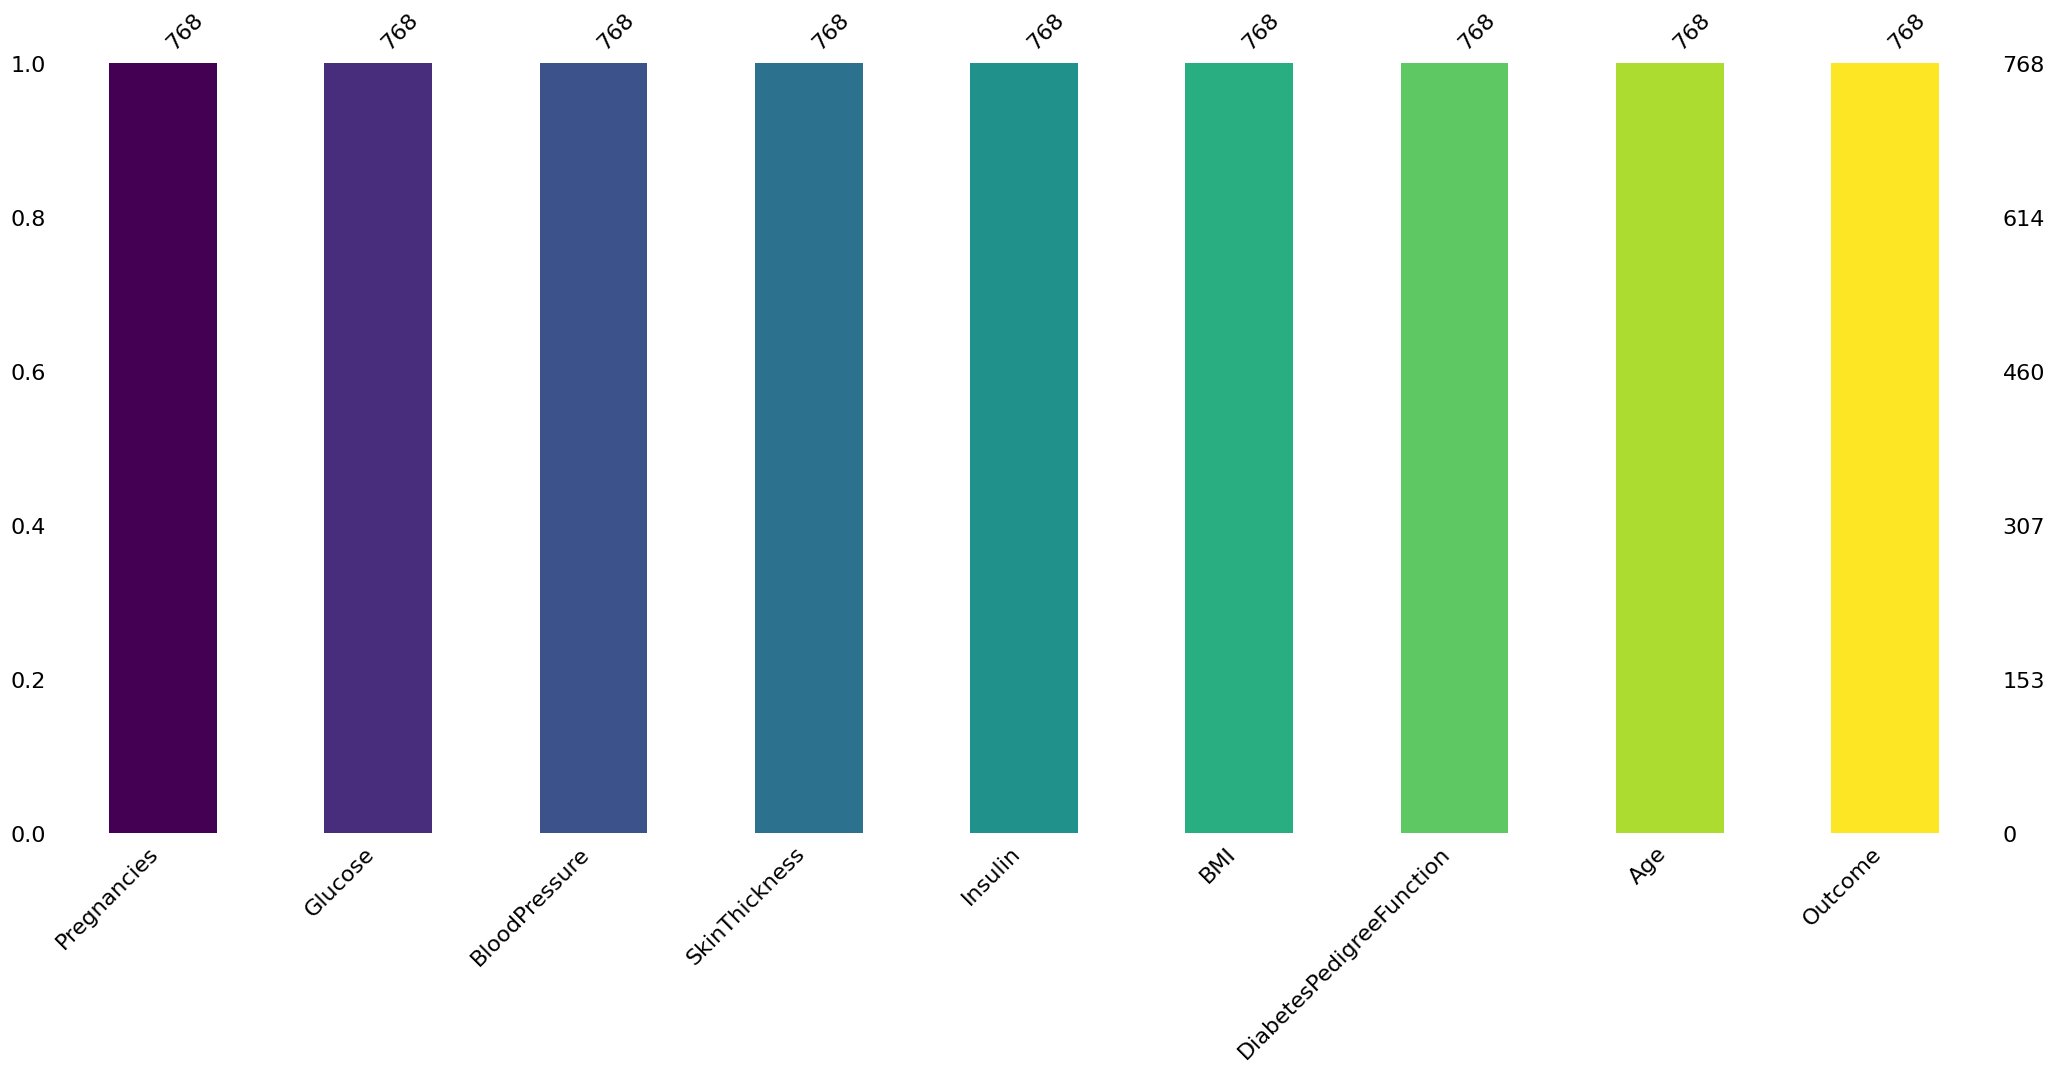

In [77]:
import missingno as msno

num_columns = len(df.columns)
colors = plt.cm.viridis(np.linspace(0, 1, num_columns))  

msno.bar(df, color=colors)
plt.show()

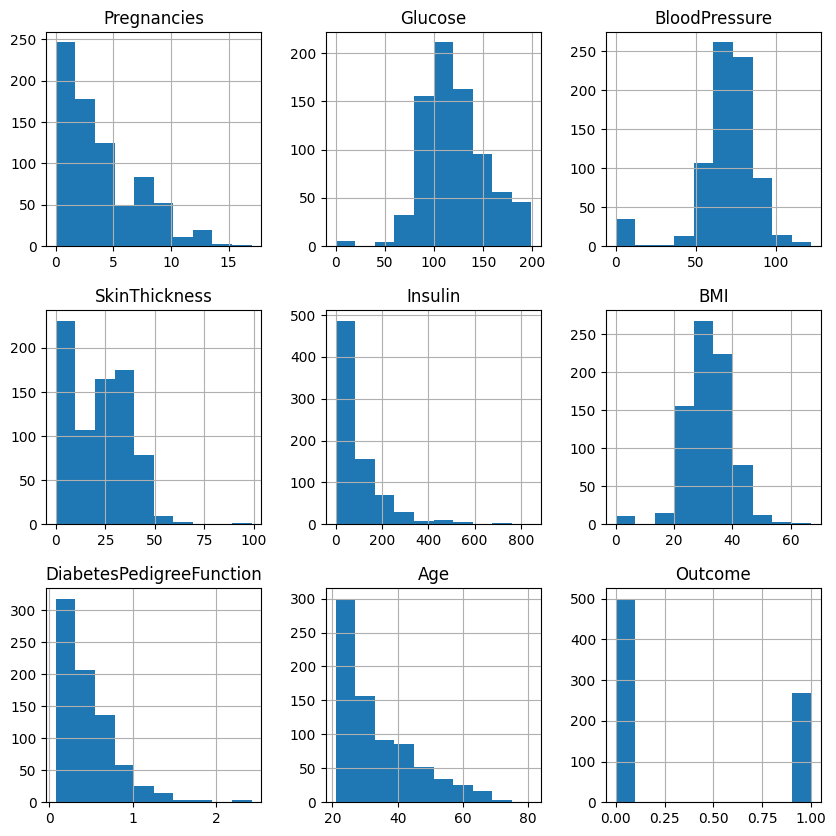

In [78]:
df.hist(figsize =(10,10))
plt.show()

KeyboardInterrupt: 

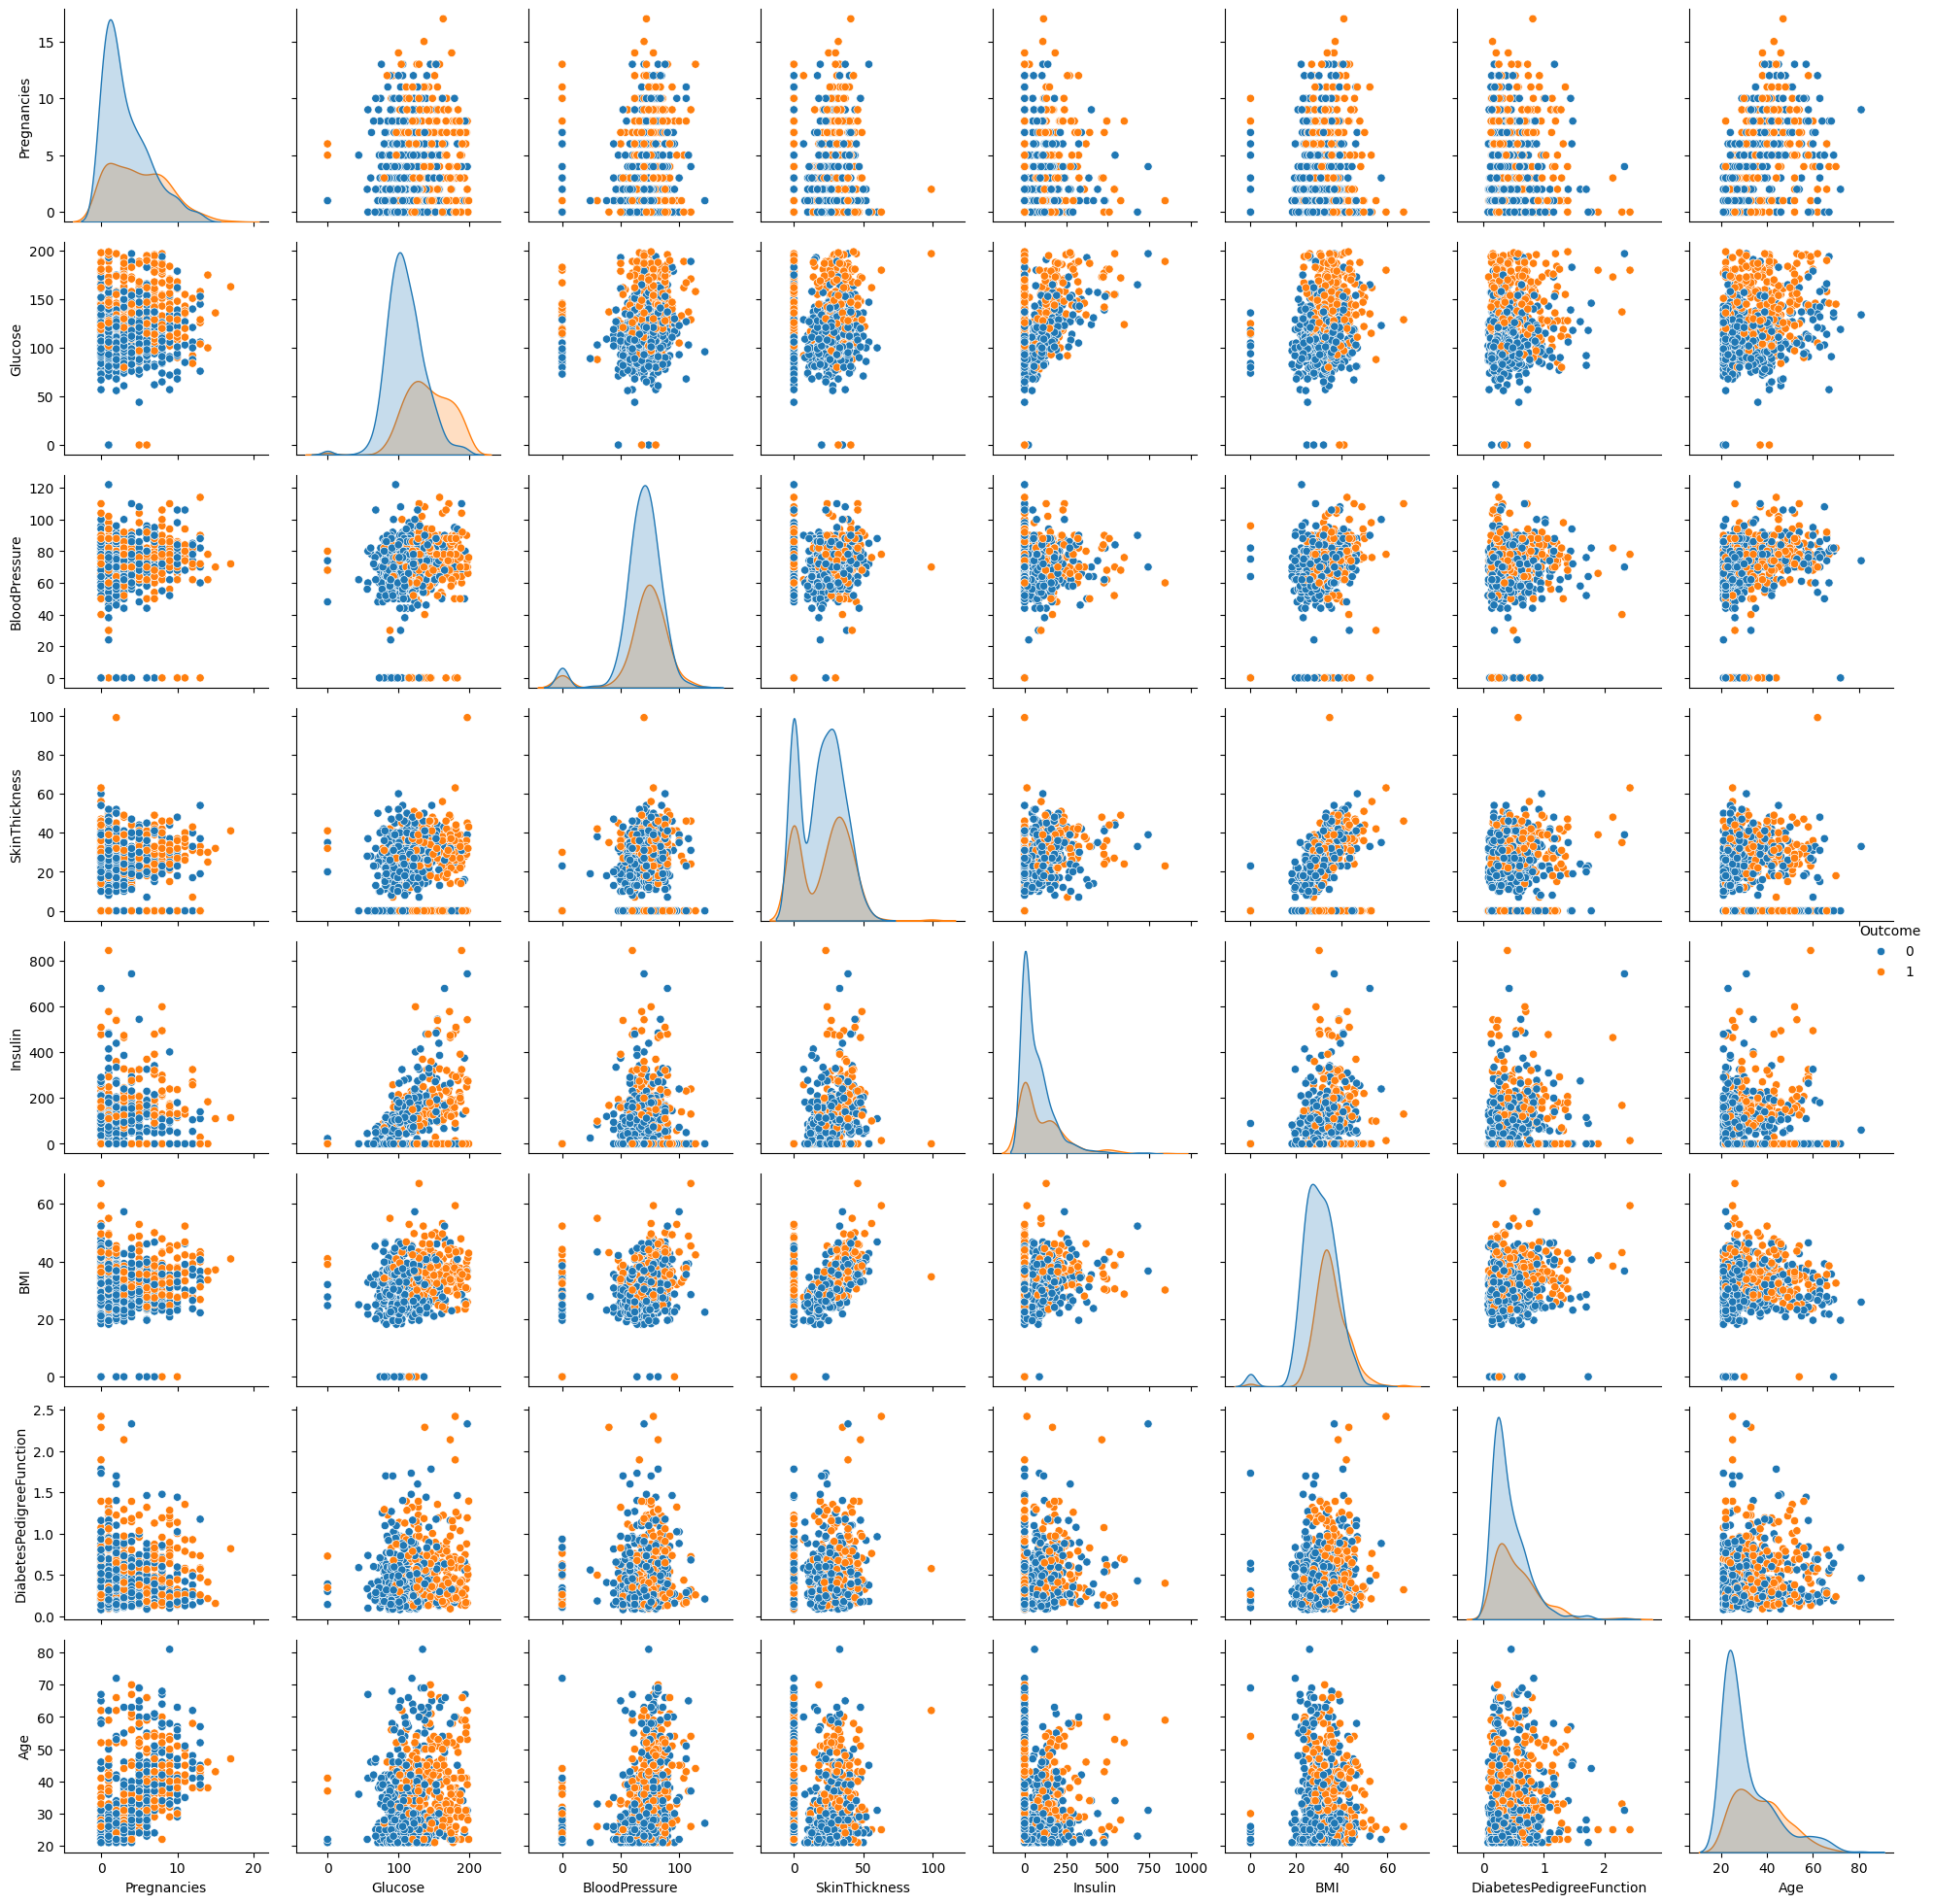

In [79]:
sns.pairplot(data = df, hue = 'Outcome' )
plt.show()

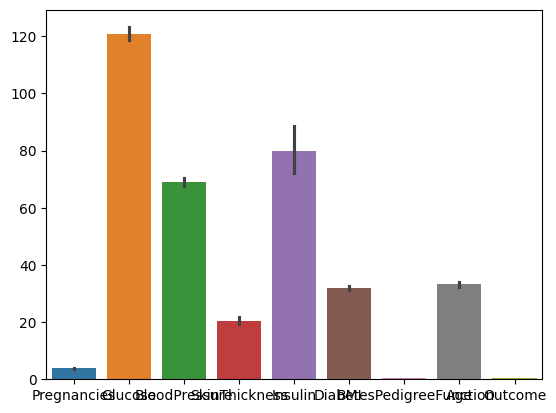

In [ ]:
sns.barplot(data = df)
plt.show()

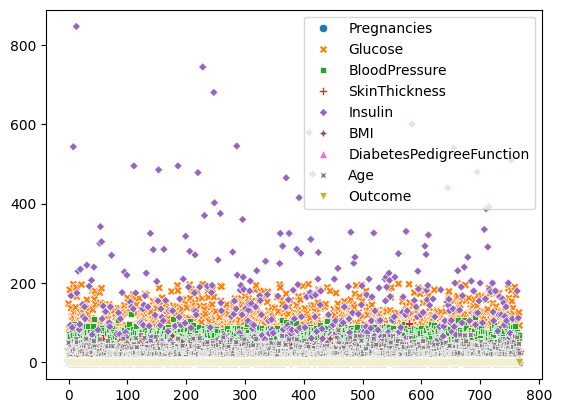

In [ ]:
sns.scatterplot(data=df)
plt.show()

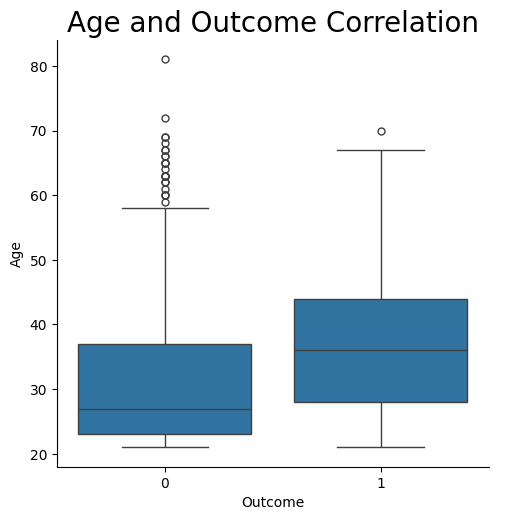

In [ ]:
p=sns.catplot(x="Outcome",y="Age", data=df, kind='box')
plt.title("Age and Outcome Correlation", size=20, y=1.0);

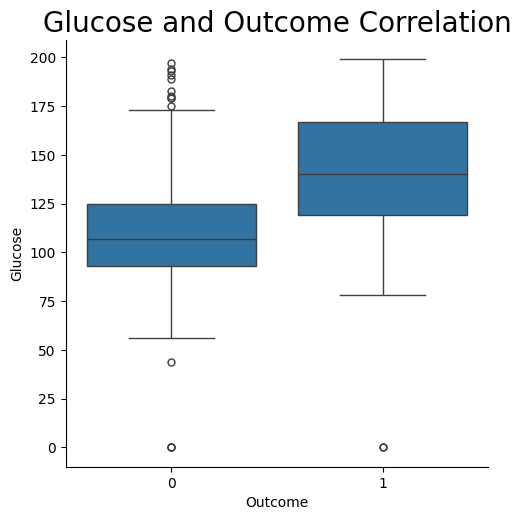

In [ ]:
p=sns.catplot(x="Outcome",y="Glucose", data=df, kind='box')
plt.title("Glucose and Outcome Correlation", size=20, y=1.0);


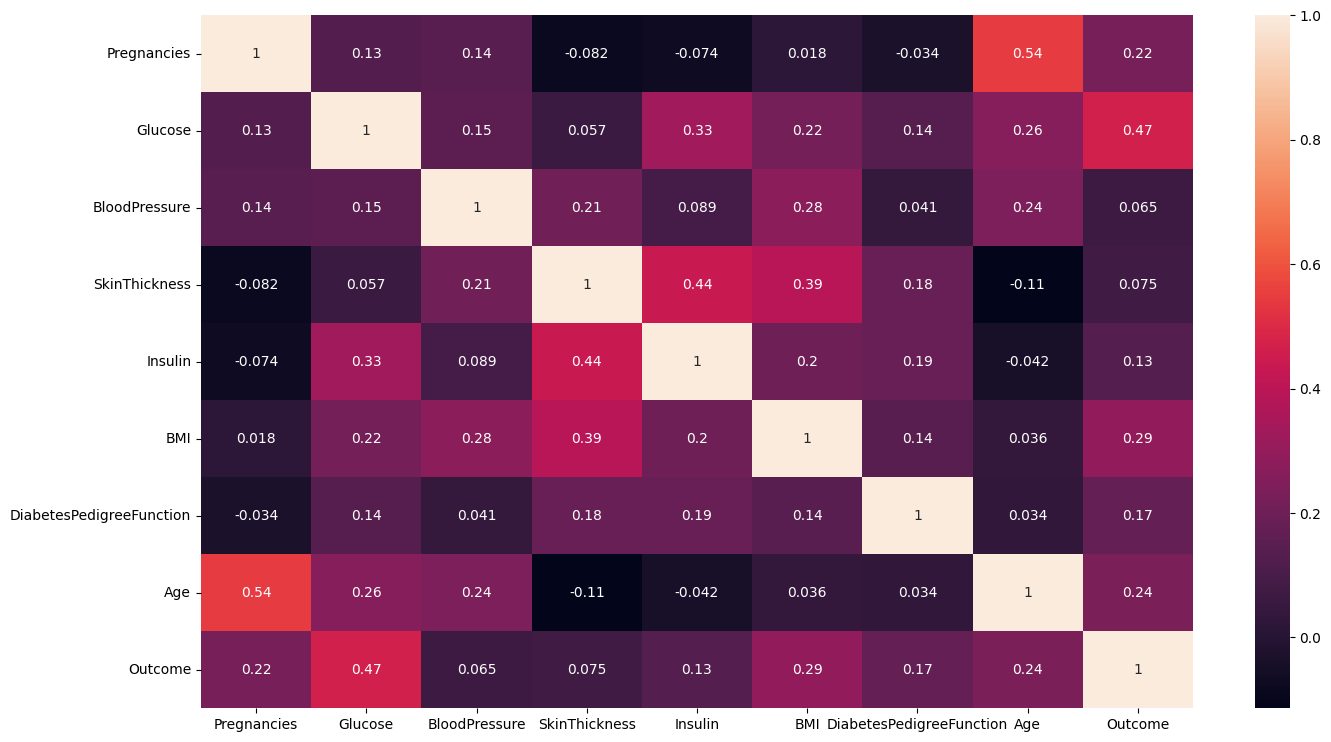

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True);

In [ ]:
hig_corr = df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Outcome"]) >= 0.2]
hig_corr_features

Index(['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome'], dtype='object')

In [ ]:
#Standard Deviation
df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]

for c in columns:
    q1 = np.percentile(df[c], 25, interpolation = 'midpoint')
    q3 = np.percentile(df[c], 75, interpolation = 'midpoint')

    IQR = q3 - q1
    low = q1 - 1.5 * IQR
    high = q3 + 1.5 * IQR 

    df[c] = np.where(df[c] < low, low, df[c])
    df[c] = np.where(df[c] > high, high, df[c])


In [ ]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

model = RandomForestClassifier(n_jobs = -1, random_state = 42, class_weight='balanced' )
model.fit(X_train,Y_train)   

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [92]:
model.score(x_test,y_test)

0.7727272727272727

Accuracy: 84.53%
Accuracy: 77.27%


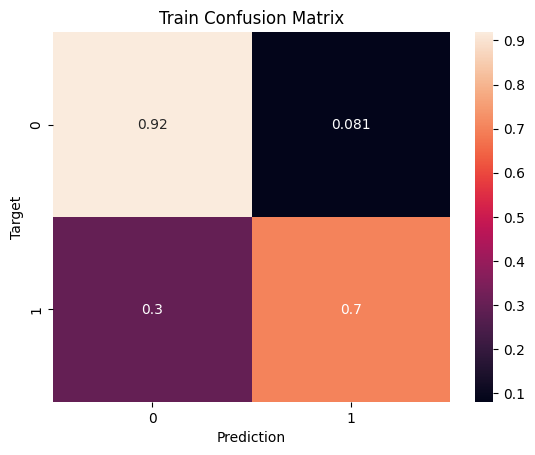

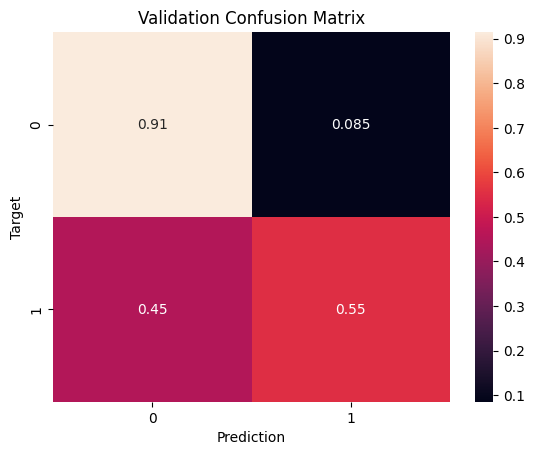

In [93]:
def predict_and_plot(model, inputs,targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))
    
    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'. format(name))
    
    return preds

train_preds = predict_and_plot(best_model, X_train, Y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(best_model, x_test, y_test, 'Validation')

In [94]:
param_grid = {
    'n_estimators': [10, 20, 30],  # Adjust the number of trees in the forest
    'max_depth': [10, 20, 30],  # Adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Adjust the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Adjust the minimum samples required in a leaf node
}

model1 = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(model1, param_grid, cv=5, n_jobs=1, scoring='accuracy')
grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_

best_model.fit(X_train, Y_train)

train_accuracy = best_model.score(X_train, Y_train)
val_accuracy = best_model.score(x_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.8452768729641694
Validation Accuracy: 0.7727272727272727


In [96]:
import joblib

joblib.dump(best_model, 'diabetes.pkl')

['diabetes.pkl']